In [17]:
import scprep
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("white")
from sklearn import datasets
import matplotlib.pyplot as plt
plt.rc('font', size=18)

In [18]:
wine = datasets.load_wine()

In [19]:
data = pd.DataFrame(wine['data'], columns=wine['feature_names'])

In [20]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


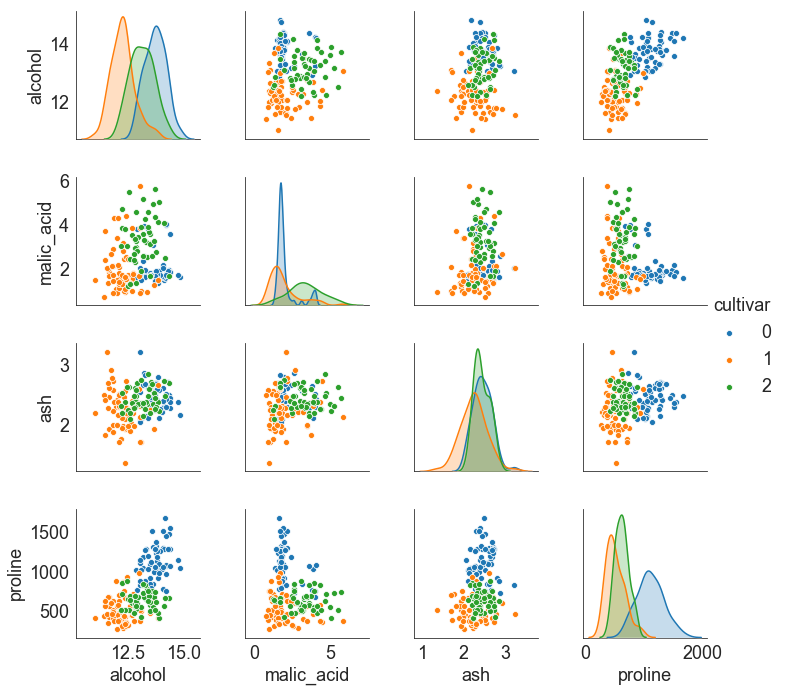

In [9]:
plt.rc('font', size=18)
cultivars = pd.Series(wine['target'], index=data.index, name='cultivar')
sns.pairplot(pd.concat([data, 
                        cultivars], axis=1), hue='cultivar',
            vars=['alcohol', 'malic_acid', 'ash', 'proline'])
plt.savefig("../img/00_wine_pairplot_small.png", dpi=300)

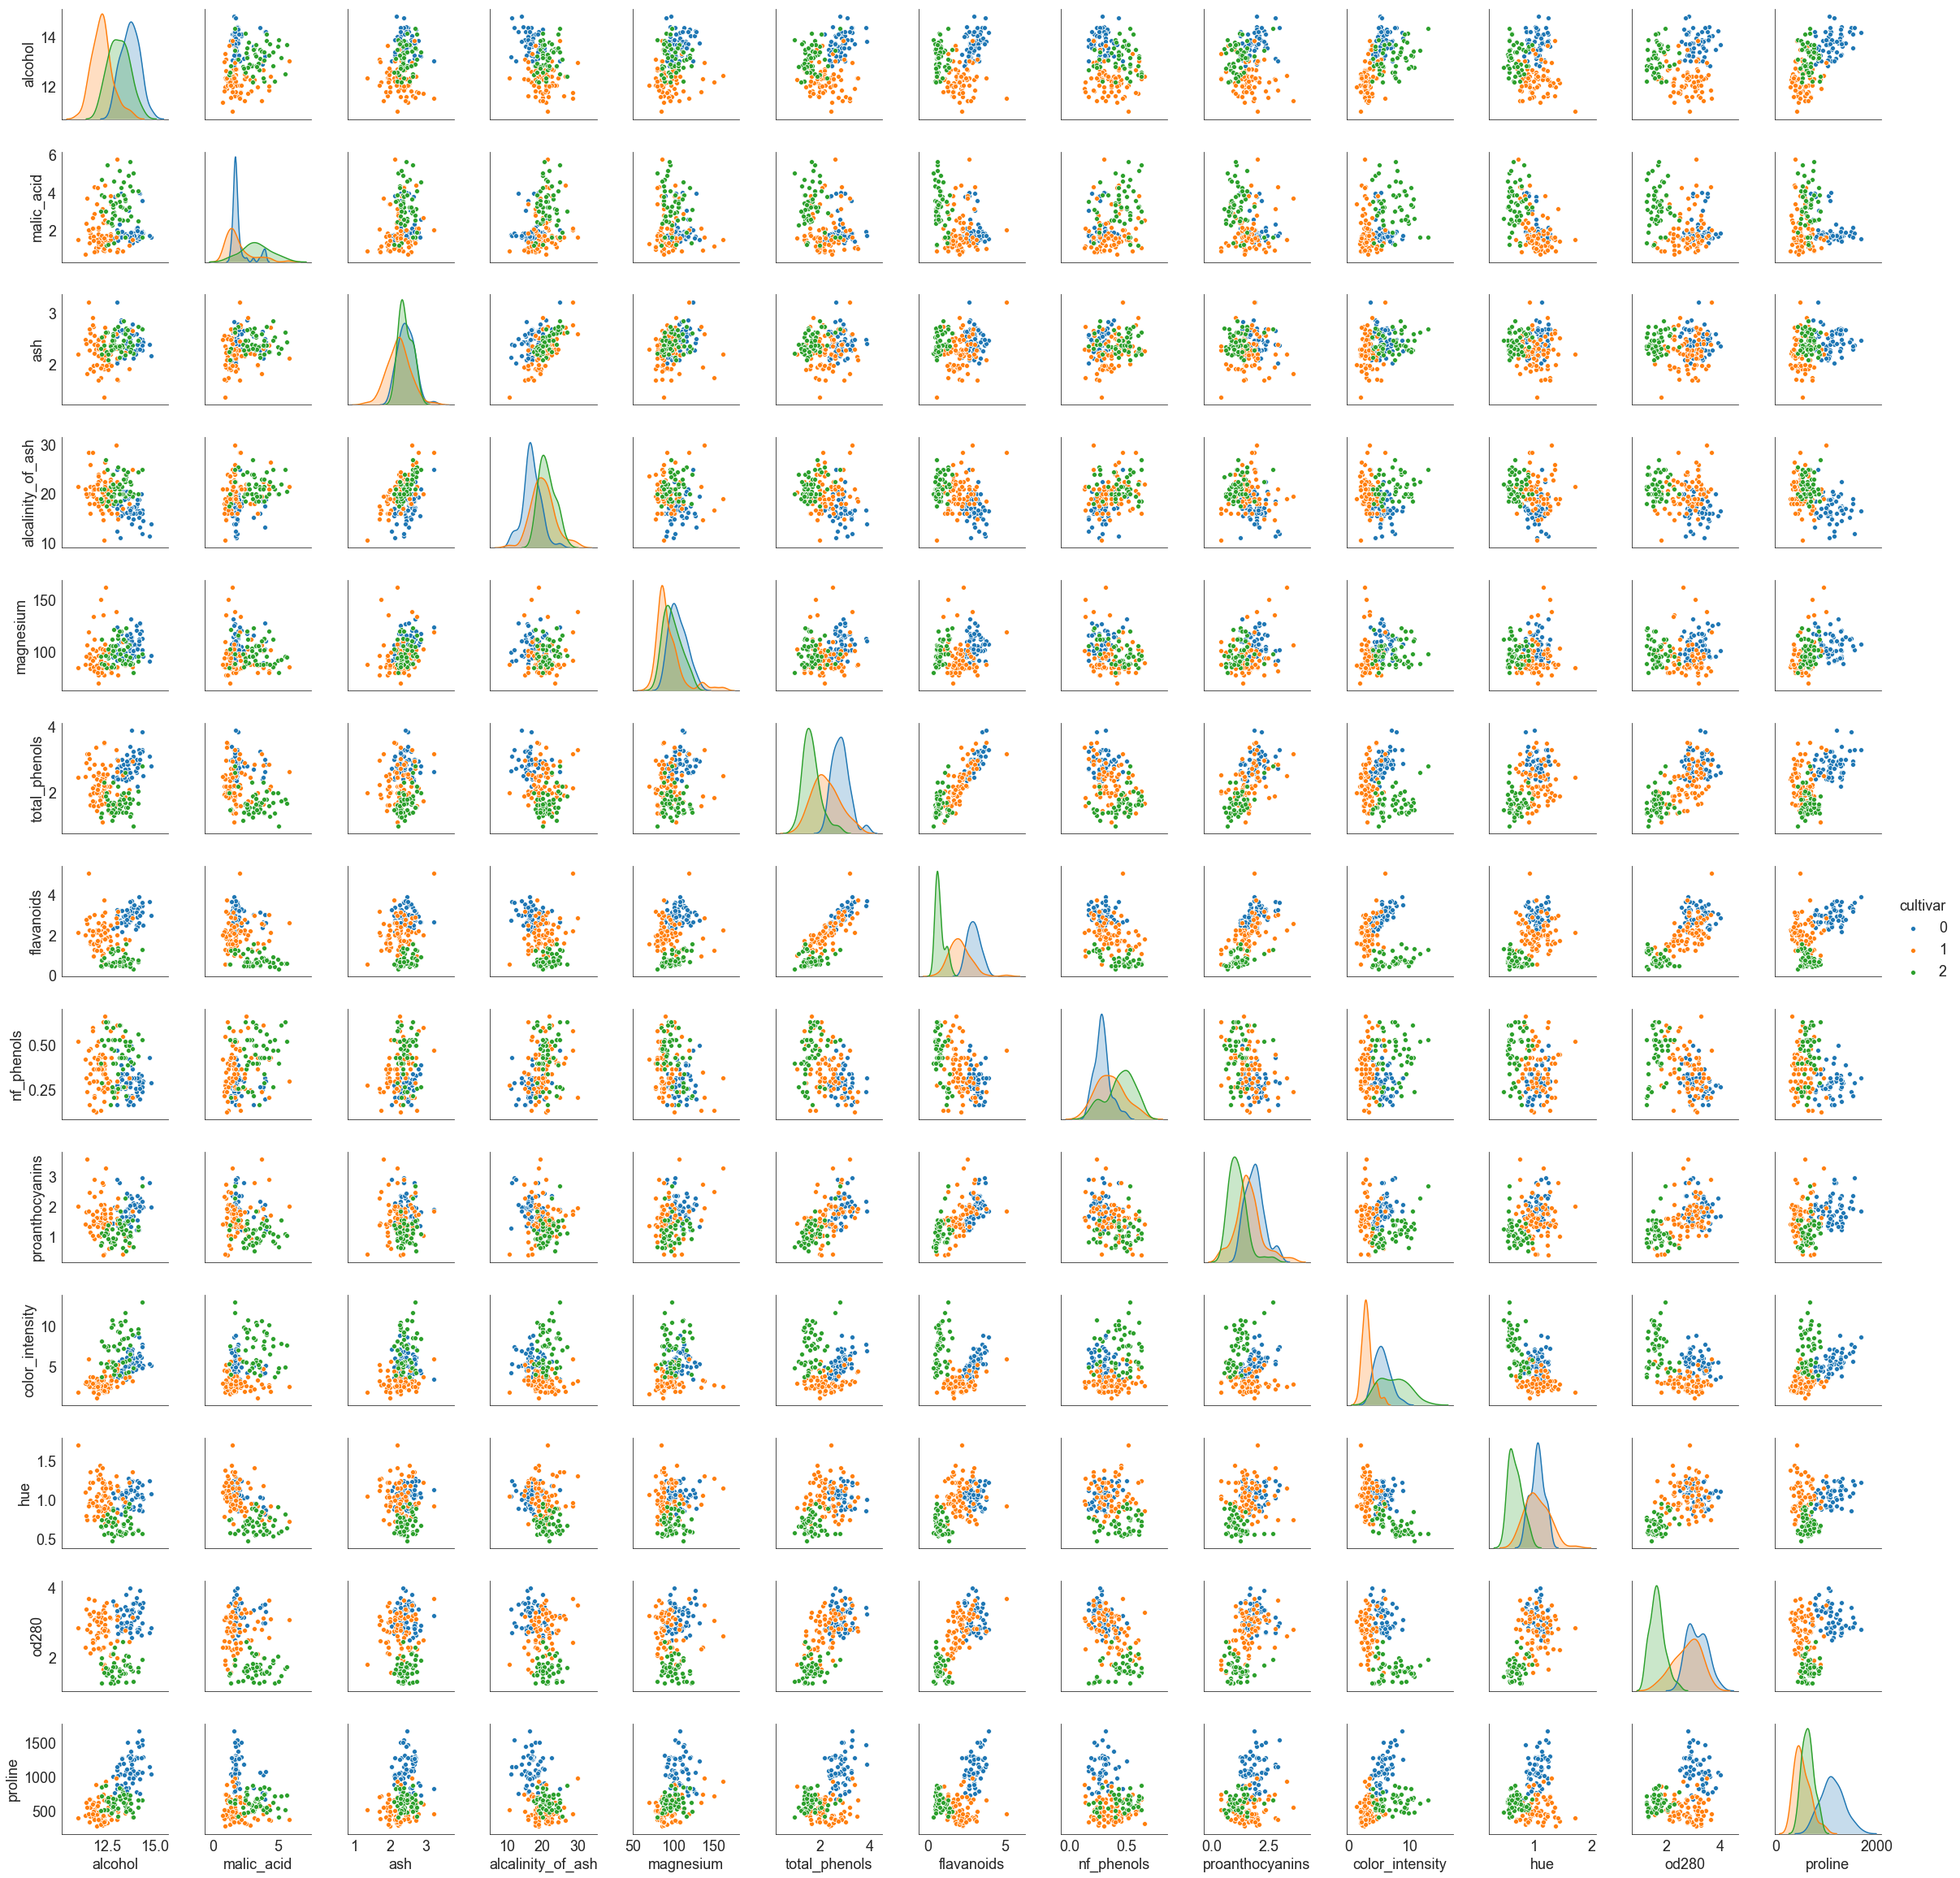

In [6]:
data.columns = np.where(data.columns == 'nonflavanoid_phenols', 'nf_phenols', data.columns)
data.columns = np.where(data.columns == 'od280/od315_of_diluted_wines', 'od280', data.columns)
sns.pairplot(pd.concat([data, 
                        pd.Series(wine['target'], index=data.index, name='cultivar')], axis=1), hue='cultivar',
            vars=data.columns)
plt.savefig("../img/00_wine_pairplot_full.png", dpi=150)

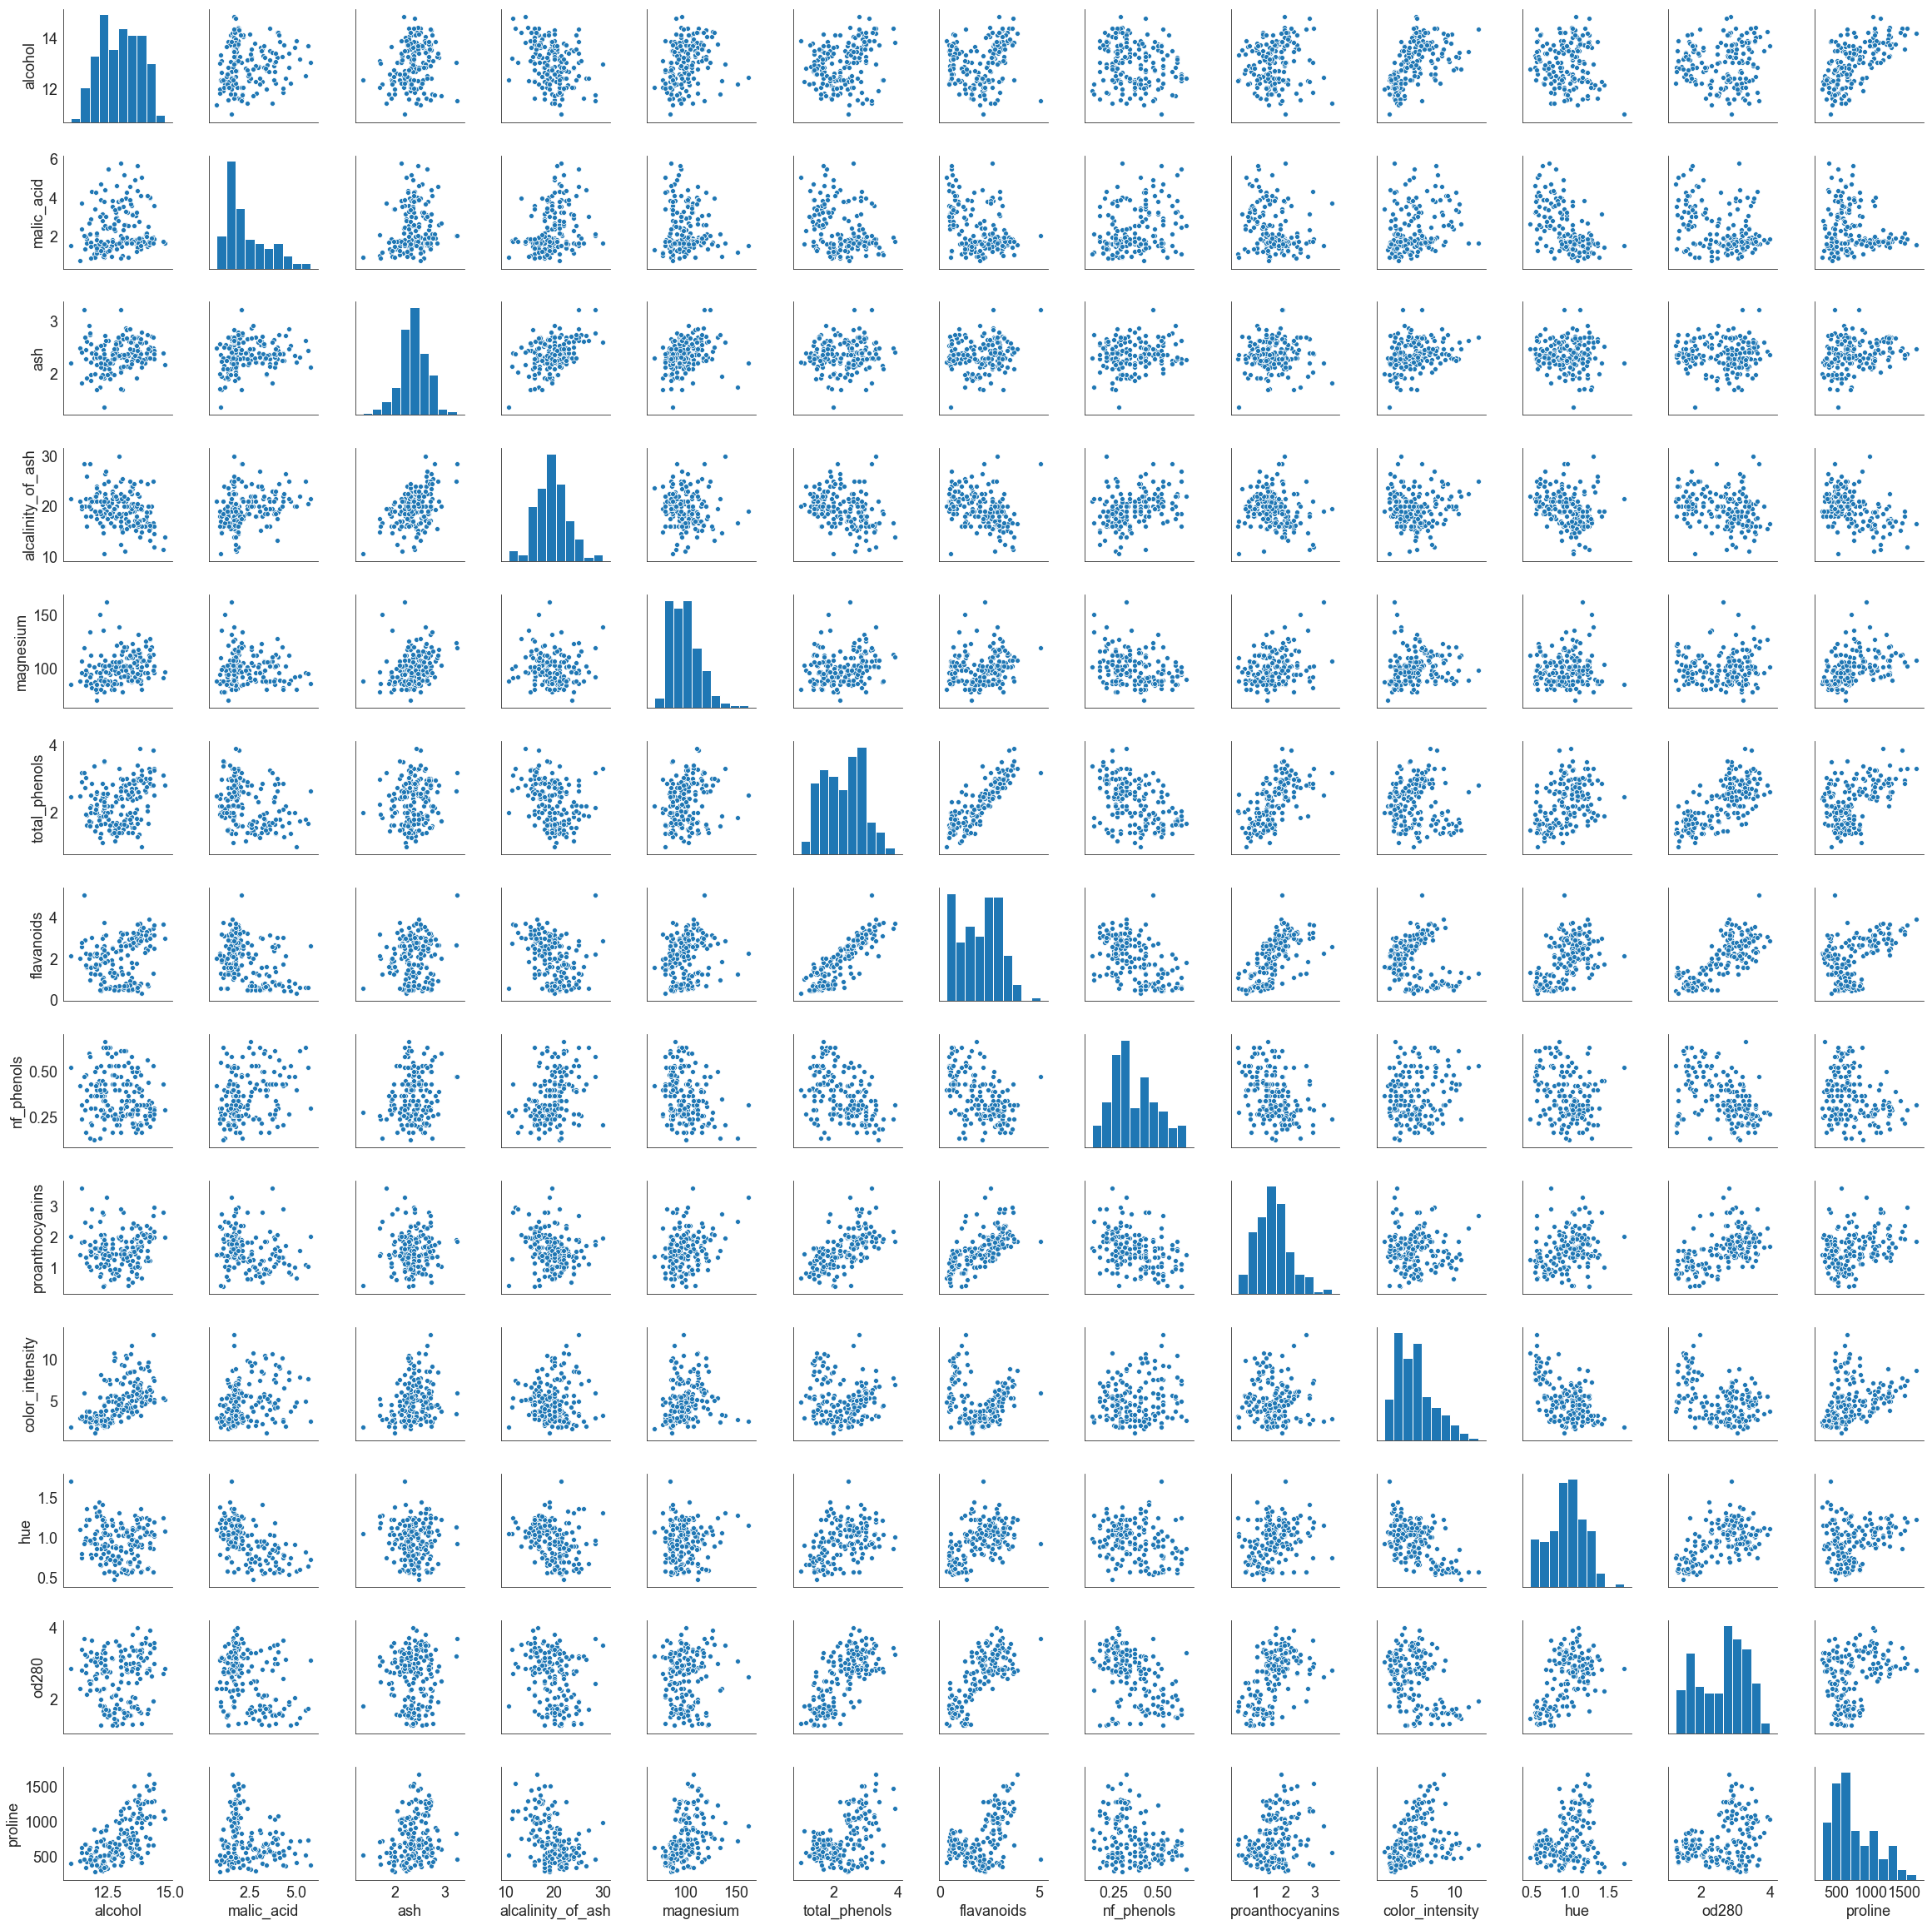

In [7]:
sns.pairplot(data)
plt.savefig("../img/00_wine_pairplot_full_nolabel.png", dpi=150)

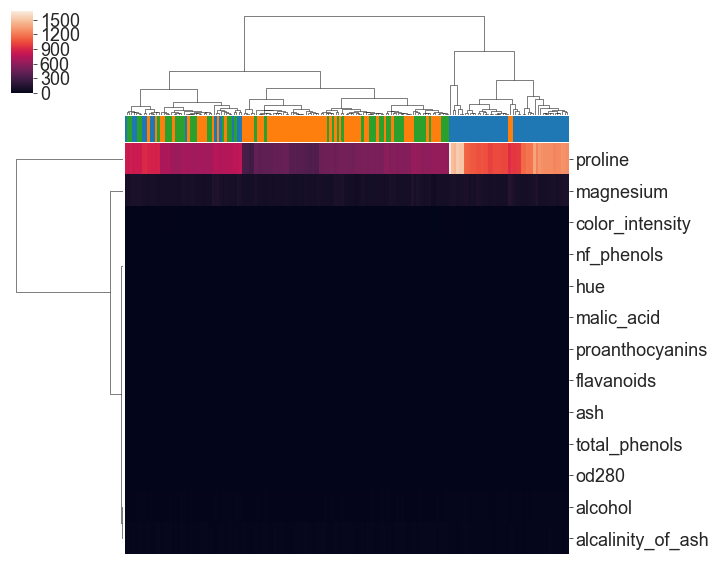

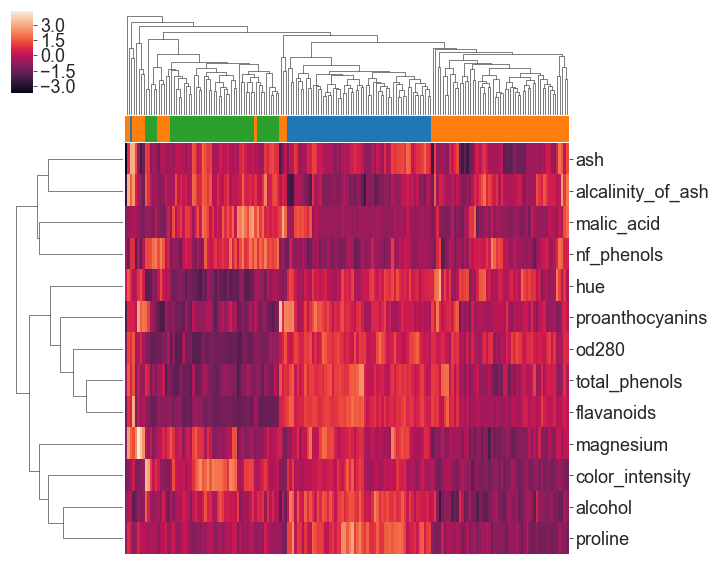

In [8]:
clust = sns.clustermap(data.T, col_colors=scprep.plot.colors.tab(3)(wine['target']), xticklabels=[])
clust.savefig("../img/00_wine_clustermap.png", dpi=300)
clust = sns.clustermap(data.T, z_score=0, col_colors=scprep.plot.colors.tab(3)(wine['target']), xticklabels=[])
clust.savefig("../img/00_wine_clustermap_zscore.png", dpi=300)

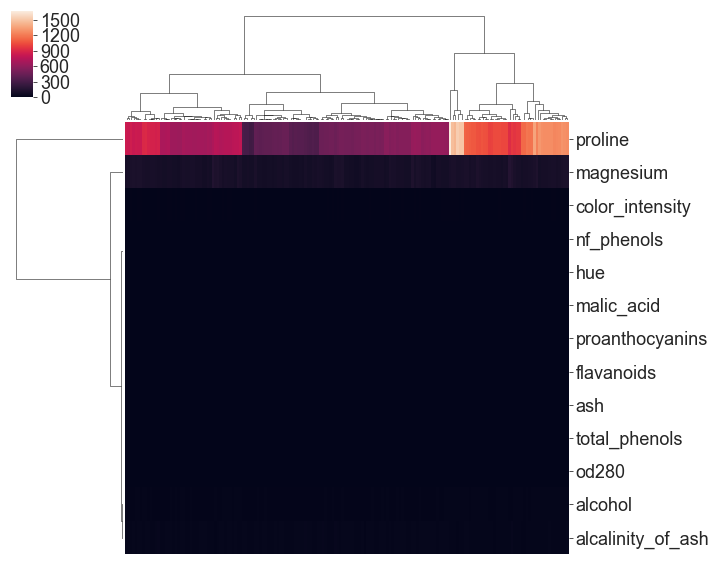

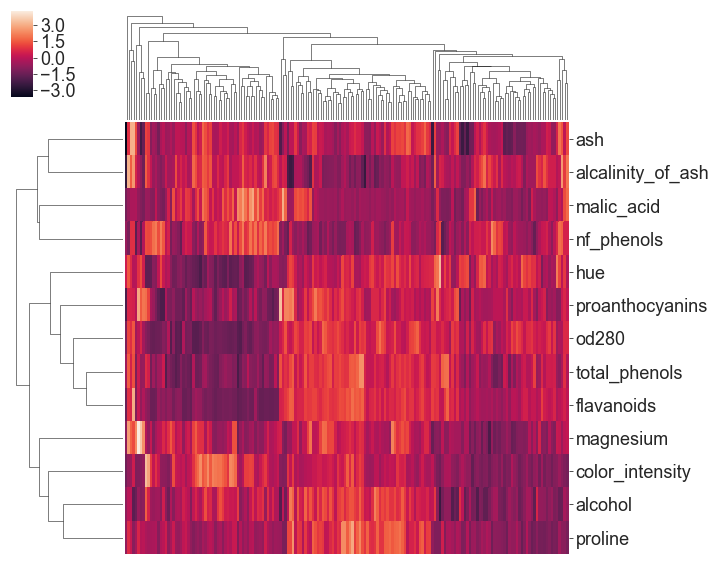

In [9]:
clust = sns.clustermap(data.T, xticklabels=[])
clust.savefig("../img/00_wine_clustermap_nolabel.png", dpi=300)
clust = sns.clustermap(data.T, z_score=0, xticklabels=[])
clust.savefig("../img/00_wine_clustermap_nolabel_zscore.png", dpi=300)

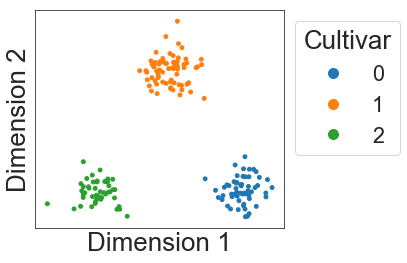

In [10]:
np.random.seed(42)
data_fake = np.random.normal(0, 0.1, (data.shape[0], 2))
data_fake[:,0] += np.where(wine['target'] == 0, 1, 0)
data_fake[:,0] += np.where(wine['target'] == 1, 1/2, 0)
data_fake[:,1] += np.where(wine['target'] == 1, np.sqrt(3)/2, 0)
scprep.plot.scatter2d(data_fake, c=wine['target'], ticks=False, label_prefix="Dimension ", legend_title='Cultivar',
                     filename="../img/00_fake_data_equidistant.png", legend_anchor=(1,1), legend_loc='upper left')

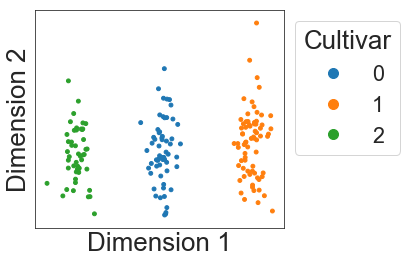

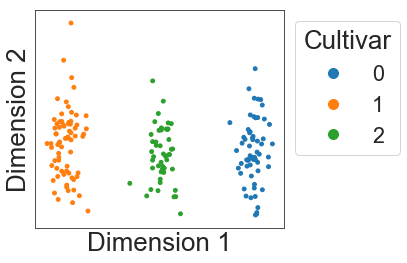

In [11]:
np.random.seed(42)
data_fake = np.random.normal(0, 0.1, (data.shape[0], 2))
data_fake[:,0] += np.where(wine['target'] == 0, 1, 0)
data_fake[:,0] += np.where(wine['target'] == 1, 2, 0)
scprep.plot.scatter2d(data_fake, c=wine['target'], ticks=False, label_prefix="Dimension ", legend_title='Cultivar',
                     filename="../img/00_fake_data_line.png", legend_anchor=(1,1))
np.random.seed(42)
data_fake = np.random.normal(0, 0.1, (data.shape[0], 2))
data_fake[:,0] += np.where(wine['target'] == 2, 1, 0)
data_fake[:,0] += np.where(wine['target'] == 0, 2, 0)
scprep.plot.scatter2d(data_fake, c=wine['target'], ticks=False, label_prefix="Dimension ", legend_title='Cultivar',
                     filename="../img/00_fake_data_line2.png", legend_anchor=(1,1))

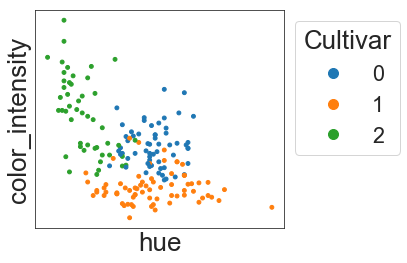

In [12]:
scprep.plot.scatter(data['hue'], data['color_intensity'], c=wine['target'], ticks=False, legend_title='Cultivar',
                     filename="../img/00_wine_scatter_hue_intensity.png", legend_anchor=(1,1), legend_loc='upper left')

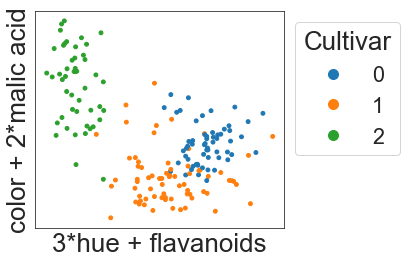

In [13]:
scprep.plot.scatter(3*data['hue'] + data['flavanoids'], data['color_intensity'] + 2 * data['malic_acid'],
                    xlabel='3*hue + flavanoids', ylabel='color + 2*malic acid',
                    c=wine['target'], ticks=False, legend_title='Cultivar',
                     filename="../img/00_wine_scatter_combo.png", legend_anchor=(1,1), legend_loc='upper left')

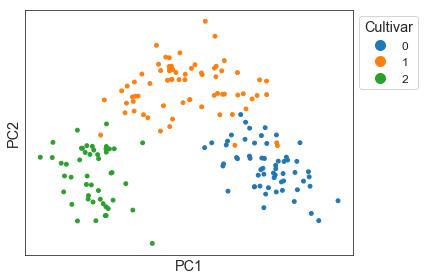

In [5]:
import sklearn.decomposition
import sklearn.preprocessing
pca_op = sklearn.decomposition.PCA()
data_scale = sklearn.preprocessing.scale(data)
data_scale = pd.DataFrame(data_scale, index=data.index, columns=data.columns)
data_pca = pca_op.fit_transform(data_scale)
scprep.plot.scatter2d(data_pca, label_prefix='PC',
                    c=wine['target'], ticks=False, legend_title='Cultivar',
                     filename="../img/00_wine_scatter_pca.png", legend_anchor=(1,1), legend_loc='upper left')

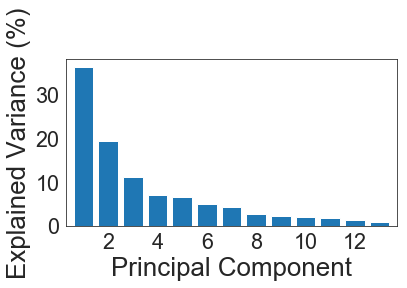

In [7]:
scprep.plot.scree_plot(pca_op.singular_values_, filename="../img/00_wine_scree.png", dpi=300)

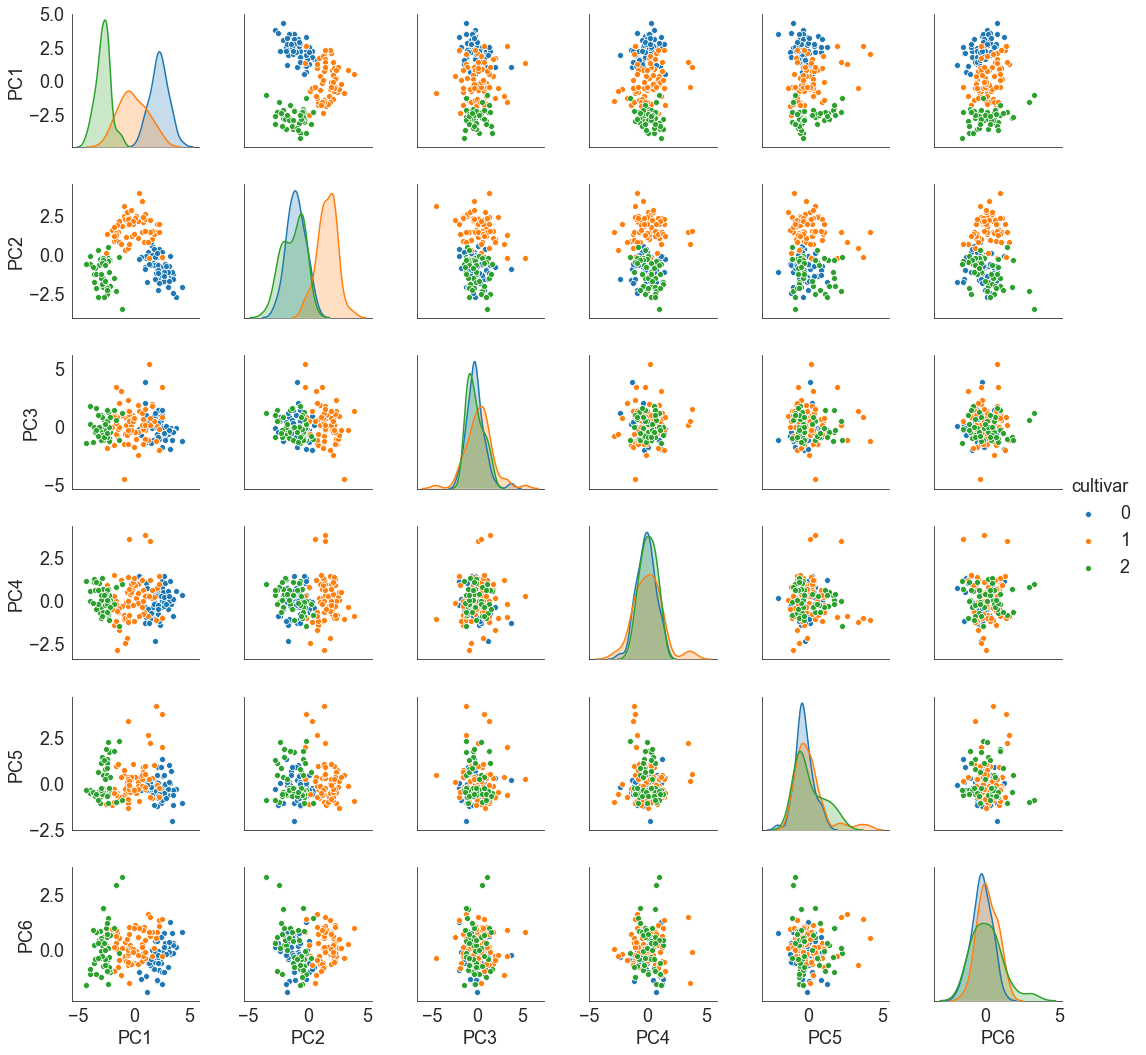

In [15]:
data_pca = scprep.reduce.pca(data_scale, 6)
sns.pairplot(pd.concat([data_pca, cultivars], axis=1), hue='cultivar', vars=data_pca.columns)

Calculating PHATE...
  Running PHATE on 178 cells and 13 genes.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.01 seconds.
  Calculating optimal t...
    Automatically selected t = 15
  Calculated optimal t in 0.01 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.02 seconds.
Calculated PHATE in 0.06 seconds.


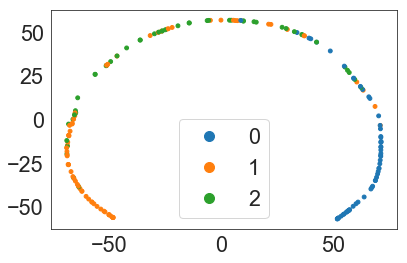

In [16]:
import phate
scprep.plot.scatter2d(phate.PHATE(knn=10).fit_transform(data), c=wine['target'])

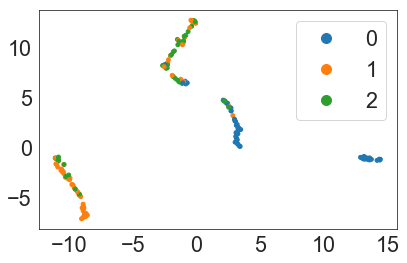

In [17]:
import umap
scprep.plot.scatter2d(umap.UMAP().fit_transform(data), c=wine['target'])

In [24]:
import louvain
import phate
G = phate.PHATE(knn=10).fit(data).graph
G_igraph = G.to_igraph()
part = louvain.find_partition(G_igraph, louvain.RBConfigurationVertexPartition, weights="weight")
clusters = np.array(part.membership)

Running PHATE on 178 cells and 13 genes.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculating affinities...
Calculated graph and diffusion operator in 0.02 seconds.


TypeError: find_partition() missing 1 required positional argument: 'partition_type'

In [25]:
clusters


array([2, 2, 2, 3, 5, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 6, 5, 5,
       2, 2, 6, 6, 2, 3, 6, 2, 3, 3, 2, 3, 2, 6, 6, 2, 2, 5, 5, 2, 2, 7,
       6, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 0, 7, 0, 4, 1, 1, 7,
       0, 0, 5, 5, 6, 1, 0, 2, 6, 1, 1, 0, 5, 0, 1, 5, 4, 0, 0, 0, 0, 8,
       7, 4, 0, 0, 0, 1, 1, 6, 4, 1, 4, 1, 5, 8, 1, 1, 7, 1, 0, 0, 1, 7,
       8, 1, 4, 1, 1, 1, 0, 1, 1, 8, 4, 0, 1, 1, 1, 1, 1, 0, 1, 8, 4, 0,
       8, 4, 4, 7, 5, 0, 8, 8, 4, 5, 0, 8, 6, 6, 1, 4, 4, 8, 0, 0, 1, 7,
       4, 5, 0, 6, 4, 4, 0, 7, 8, 7, 4, 0, 7, 7, 5, 4, 0, 0, 4, 5, 5, 6,
       6, 8])